<a href="https://colab.research.google.com/github/blessondensil294/AV-Hackathon-Interest-Rates/blob/master/AV_Hackathon_Interest_Rate_Category_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JanataHack: Machine Learning for Banking

Banks offer various kinds of accounts and provide loans based on the requirements. Apart from it, there are other various activities like investments in market and different funds. Overall, the banking sector has a wide impact on the economy directly and indirectly.

There are many banks across the globe that are leveraging machine learning and AI in their daily routine and getting benefits out of it.

For example, top banks in the US like JPMorgan, Wells Fargo, Bank of America, City Bank and US banks are already using machine learning to provide various facilities to customers as well as for risk prevention and detection. Some of the applications include:

1. Customer Support

2. Fraud Detection

3. Risk Modelling

4. Marketing Analytics

5. Customer Segmentation

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.


Variable - Definition

Loan_ID - A unique id for the loan.

Loan_Amount_Requested - The listed amount of the loan applied for by the borrower.

Length_Employed - Employment length in years

Home_Owner - The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.

Annual_Income - The annual income provided by the borrower during registration.

Income_Verified - Indicates if income was verified, not verified, or if the income source was verified

Purpose_Of_Loan - A category provided by the borrower for the loan request. 

Debt_To_Income - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

Inquiries_Last_6Mo - The number of inquiries by creditors during the past 6 months.

Months_Since_Deliquency - The number of months since the borrower's last delinquency.

Number_Open_Accounts - The number of open credit lines in the borrower's credit file.

Total_Accounts - The total number of credit lines currently in the borrower's credit file

Gender - Gender

Interest_Rate - Target Variable: Interest Rate category (1/2/3) of the loan application

## Load the Data From Github

In [0]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/AV-Hackathon-Interest-Rates/master/Data/test_fjtUOL8.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/AV-Hackathon-Interest-Rates/master/Data/train_fNxu4vz.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [2]:
df_Train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [3]:
df_Train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [4]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [5]:
df_Train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [6]:
df_Train.shape

(164309, 14)

In [8]:
df_Test.shape

(109541, 13)

In [7]:
df_Train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

## Data Visualization

To Find the count of the Interest rate

In [26]:
#Counting Interest Rates
df_Train['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

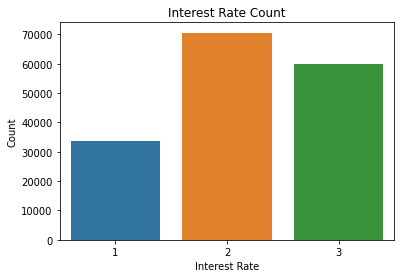

In [28]:
#Counting no of Product which has reached
sns.countplot(x='Interest_Rate',data=df_Train)
plt.xlabel("Interest Rate")
plt.ylabel("Count")
plt.title("Interest Rate Count")
plt.show()

## Feature Engineer

Drop the Loan ID Columns since its irrelevant

In [0]:
df_Train = df_Train.drop(['Loan_ID'], axis=1)

### Drop Duplicates

In [10]:
df_Train.shape

(164309, 13)

In [0]:
df_Train.drop_duplicates(keep='first', inplace=True)

### Fill Missing Values

In [0]:
df_Train.isnull().sum()

In [0]:
df_Train['Home_Owner'] = df_Train['Home_Owner'].fillna('None')
df_Test['Home_Owner'] = df_Test['Home_Owner'].fillna('None')
df_Train['Home_Owner'] = df_Train['Home_Owner'].replace(to_replace='Other', value='None')
df_Test['Home_Owner'] = df_Test['Home_Owner'].replace(to_replace='Other', value='None')
df_Train['Length_Employed'] = df_Train['Length_Employed'].ffill()
df_Test['Length_Employed'] = df_Test['Length_Employed'].ffill()
df_Train['Annual_Income'] = df_Train['Annual_Income'].ffill()
df_Test['Annual_Income'] = df_Test['Annual_Income'].ffill()
df_Train['Months_Since_Deliquency'] = df_Train['Months_Since_Deliquency'].ffill()
df_Train['Months_Since_Deliquency'] = df_Train['Months_Since_Deliquency'].bfill()
df_Test['Months_Since_Deliquency'] = df_Test['Months_Since_Deliquency'].ffill()

### Outlier Detection

Annual Income Columns Outlier Detections and Replace

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


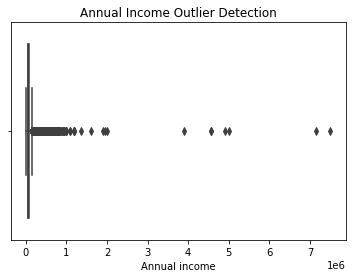

In [25]:
sns.boxplot(x=df_Train['Annual_Income'])
plt.title('Annual Income Outlier Detection')
plt.xlabel('Annual income')
plt.show()

In [13]:
df_Train['Annual_Income'].describe()

count    1.643090e+05
mean     7.325752e+04
std      5.925473e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.844500e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [36]:
Q1 = df_Train['Annual_Income'].quantile(0.25)
Q3 = df_Train['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

43445.0


In [37]:
print(df_Train['Annual_Income'].skew())

38.9492293066376


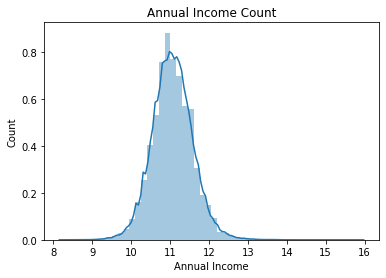

In [7]:
sns.distplot(df_Train['Annual_Income'])
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income Count')
plt.show()

In [30]:
#Outlier Removal Based on Flooring and Capping
print(df_Train['Annual_Income'].quantile(0.10))
print(df_Train['Annual_Income'].quantile(0.90))
df_Train['Annual_Income'] = np.where(df_Train['Annual_Income'] <34000.0, 34000.0,df_Train['Annual_Income'])
df_Train['Annual_Income'] = np.where(df_Train['Annual_Income'] >120000.0, 120000.0,df_Train['Annual_Income'])
print(df_Train['Annual_Income'].skew())

34000.0
120000.0


In [0]:
#Log Transformation to remove the outliers
df_Train['Annual_Income'] = df_Train['Annual_Income'].map(lambda i: np.log(i) if i > 0 else 0)
df_Test['Annual_Income'] = df_Test['Annual_Income'].map(lambda i: np.log(i) if i > 0 else 0)

### Scaling the Columns

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

In [10]:
df_Train.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

Loan Amount Requested Colmn


In [0]:
df_Train['Loan_Amount_Requested'] = df_Train['Loan_Amount_Requested'].str.replace(',', '').astype(int)
df_Test['Loan_Amount_Requested'] = df_Test['Loan_Amount_Requested'].str.replace(',', '').astype(int)
df_Train[['Loan_Amount_Requested']] = mm_scaler.fit_transform(df_Train[['Loan_Amount_Requested']])
df_Test[['Loan_Amount_Requested']] = mm_scaler.fit_transform(df_Test[['Loan_Amount_Requested']])

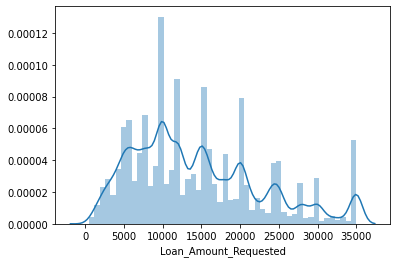

In [11]:
sns.distplot(df_Train['Loan_Amount_Requested'])
plt.show()

## Encoding of the Columns

For Tree based algorithm

In [15]:
df_Train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,0.188406,10,3,11.127263,2,0,18.37,0,17,9,12,0,1
1,0.855072,4,0,11.127263,0,2,14.93,0,17,12,22,0,3
2,0.702174,7,0,11.232767,1,2,15.88,0,17,12,14,1,3
3,0.449275,10,1,10.935960,1,2,14.34,3,17,16,20,1,3
4,0.478261,8,2,11.472103,1,2,22.17,1,17,19,28,0,1


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Train['Length_Employed'] = le.fit_transform(df_Train['Length_Employed'])
df_Test['Length_Employed'] = le.fit_transform(df_Test['Length_Employed'])
df_Train['Home_Owner'] = le.fit_transform(df_Train['Home_Owner'])
df_Test['Home_Owner'] = le.fit_transform(df_Test['Home_Owner'])
df_Train['Income_Verified'] = le.fit_transform(df_Train['Income_Verified'])
df_Test['Income_Verified'] = le.fit_transform(df_Test['Income_Verified'])
df_Train['Purpose_Of_Loan'] = le.fit_transform(df_Train['Purpose_Of_Loan'])
df_Test['Purpose_Of_Loan'] = le.fit_transform(df_Test['Purpose_Of_Loan'])
df_Train['Inquiries_Last_6Mo'] = le.fit_transform(df_Train['Inquiries_Last_6Mo'])
df_Test['Inquiries_Last_6Mo'] = le.fit_transform(df_Test['Inquiries_Last_6Mo'])
df_Train['Months_Since_Deliquency'] = le.fit_transform(df_Train['Months_Since_Deliquency'])
df_Test['Months_Since_Deliquency'] = le.fit_transform(df_Test['Months_Since_Deliquency'])
df_Train['Number_Open_Accounts'] = le.fit_transform(df_Train['Number_Open_Accounts'])
df_Test['Number_Open_Accounts'] = le.fit_transform(df_Test['Number_Open_Accounts'])
df_Train['Total_Accounts'] = le.fit_transform(df_Train['Total_Accounts'])
df_Test['Total_Accounts'] = le.fit_transform(df_Test['Total_Accounts'])
df_Train['Gender'] = le.fit_transform(df_Train['Gender'])
df_Test['Gender'] = le.fit_transform(df_Test['Gender'])

## Feature Selection

### Correlation of Data

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df_Train.corr()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
Loan_Amount_Requested,1.000000,-0.053633,-0.189622,0.436598,-0.361991,-0.151835,0.058314,-0.007659,-0.021101,0.203138,0.233493,0.001468,0.132486
Length_Employed,-0.053633,1.000000,0.069004,-0.061520,0.017429,0.012977,-0.015453,-0.000155,0.012046,-0.020266,-0.061451,-0.002596,-0.005465
Home_Owner,-0.189622,0.069004,1.000000,-0.220562,0.078791,0.035868,0.001704,-0.055485,0.019223,-0.124970,-0.211423,0.000930,0.059018
Annual_Income,0.436598,-0.061520,-0.220562,1.000000,-0.107810,-0.008690,-0.173848,0.066570,-0.040548,0.198361,0.279219,0.000437,-0.067633
Income_Verified,-0.361991,0.017429,0.078791,-0.107810,1.000000,0.008206,-0.114140,-0.066530,-0.002805,-0.067831,-0.099067,-0.004768,-0.213371
Purpose_Of_Loan,-0.151835,0.012977,0.035868,-0.008690,0.008206,1.000000,-0.109030,0.052450,-0.004258,-0.089431,-0.070361,0.002136,0.107253
Debt_To_Income,0.058314,-0.015453,0.001704,-0.173848,-0.114140,-0.109030,1.000000,-0.005142,0.002868,0.302538,0.229930,-0.000392,0.152472
Inquiries_Last_6Mo,-0.007659,-0.000155,-0.055485,0.066570,-0.066530,0.052450,-0.005142,1.000000,0.007408,0.100905,0.131522,0.000556,0.188987
Months_Since_Deliquency,-0.021101,0.012046,0.019223,-0.040548,-0.002805,-0.004258,0.002868,0.007408,1.000000,-0.021932,-0.027325,0.002809,-0.018957
Number_Open_Accounts,0.203138,-0.020266,-0.124970,0.198361,-0.067831,-0.089431,0.302538,0.100905,-0.021932,1.000000,0.682359,0.001264,0.002817


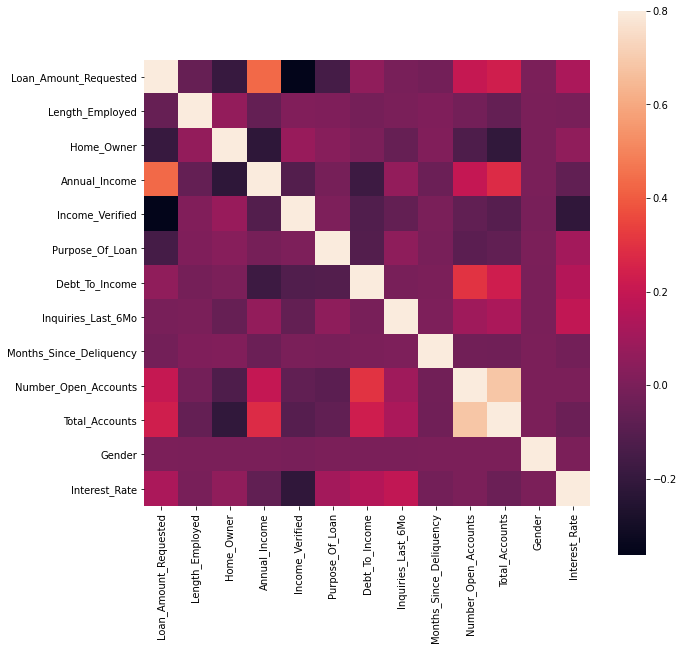

In [19]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

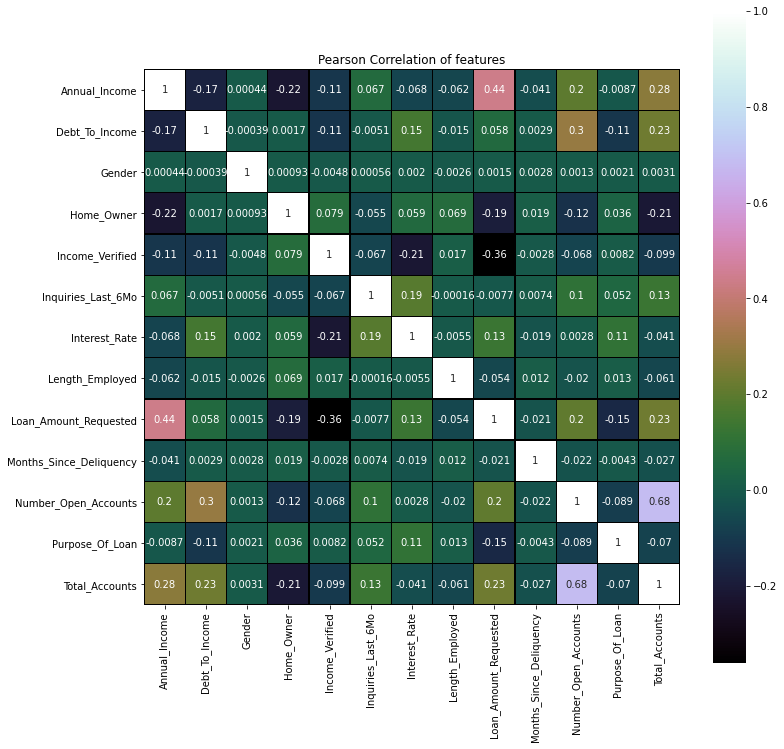

In [21]:

str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_Train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_Train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
train_num = df_Train[num_list]
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

### Multi-Collineartiy of the Data

In [0]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
df_multi = df_Train
df_multi = df_multi.drop('Interest_Rate', axis=1)

In [0]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

In [25]:
vif.round(1)

,VIF Factor,features
0,5.2,Loan_Amount_Requested
1,2.4,Length_Employed
2,2.1,Home_Owner
3,27.6,Annual_Income
4,2.8,Income_Verified
5,2.3,Purpose_Of_Loan
6,6.3,Debt_To_Income
7,1.6,Inquiries_Last_6Mo
8,3.5,Months_Since_Deliquency
9,11.9,Number_Open_Accounts


# Data Modelling

## Balance the Data

In [29]:
df_Train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,0.188406,10,3,11.127263,2,0,18.37,0,17,9,12,0,1
1,0.855072,4,0,11.127263,0,2,14.93,0,17,12,22,0,3
2,0.702174,7,0,11.232767,1,2,15.88,0,17,12,14,1,3
3,0.449275,10,1,10.935960,1,2,14.34,3,17,16,20,1,3
4,0.478261,8,2,11.472103,1,2,22.17,1,17,19,28,0,1


In [0]:
x = df_Train
#x = x.drop(['Loan_ID'], axis=1)
x = x.drop(['Interest_Rate'], axis=1)
y = df_Train['Interest_Rate']
x_pred = df_Test
x_pred = x_pred.drop(['Loan_ID'], axis=1)

In [12]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')
x_sm, y_sm = sm.fit_resample(x,y)
x_sm = pd.DataFrame(x_sm)
x_sm.columns = x.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## LightGBM Modelling

In [0]:
import lightgbm as lgb
lgb_cl = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.15,
                            num_leaves=300, max_depth=5, scale_pos_weight=2.5,  
                            n_estimators=1000, objective='multiclass', 
                            importance_type='gain', max_bin=60, 
                            silent=True, random_state=294, n_jobs=-1, verbosity=-1,
                            class_weight='balanced'
                        )

In [41]:
lgb_cl.fit(x_sm,np.ravel(y_sm))

LGBMClassifier(boosting_type='dart', class_weight='balanced',
               colsample_bytree=1.0, importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=300, objective='multiclass',
               random_state=294, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=2.5, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [0]:
train_data = lgb.Dataset(x_sm,label=y_sm)

In [0]:
param = {
    'learning_rate':0.15,
    'n_estimators':500,
    'max_depth':5,
    'boosting':'gbdt',
    'num_class':3,
    'objective':'multiclass',
    'importance_type':'gain',
    'silent':True,
#    'random_state':294,
#    'n_jobs':-1,
    'class_weight':'balanced'
#    'num_leaves':300,
#    'max_bin':60,
#    'bagging_fraction':0.9,
#    'feature_fraction':0.9,
#    'subsample_freq':2,
#    'scale_pos_weight':2.5
}

In [38]:
lgb_cv = lgb.cv(param,train_data, num_boost_round=10000, nfold=10, shuffle=True, 
                 metrics='F1_Score', stratified=True, verbose_eval=20, early_stopping_rounds=100)

nround = lgb_cv['multi_logloss-mean'].index(np.min(lgb_cv['multi_logloss-mean']))
print(nround)

model = lgb.train(params, d_train, num_boost_round=nround)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LightGBMError: ignored

In [0]:
y_pred = lgb_cl.predict(x_pred)

In [43]:
y_pred

array([1, 1, 3, ..., 2, 3, 1])

In [0]:
#converting probabilities into 0 or 1
for i in range(0,23490):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [0]:
submission_df = pd.DataFrame({'Loan_ID':df_Test['Loan_ID'], 'Interest_Rate':y_pred})
submission_df.to_csv('Sample Submission lgbv1.csv', index=False)

## xgBoost

In [0]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='multi:softmax', booster='gbtree', learning_rate=0.1, max_depth=6, 
                          #subsample=0.90, gamma=0.1, 
                          n_estimator=1000, tree_method='hist', eval_metric='mlogloss',
                          #scale_pos_weight=1.5, base_score=0.2, updater="grow_histmaker",
                          silent=0, verbosity=0, n_jobs=-1, random_state=294, seed=200) 

In [29]:
xg_cl.fit(x_sm,np.ravel(y_sm))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimator=1000,
              n_estimators=100, n_jobs=-1, nthread=None,
              objective='multi:softprob', random_state=294, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=200, silent=0, subsample=1,
              tree_method='hist', verbosity=0)

In [0]:
y_pred = xg_cl.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'Loan_ID':df_Test['Loan_ID'], 'Interest_Rate':y_pred})
submission_df.to_csv('Sample Submission xgbootv1.csv', index=False)

## CatBoost Modelling

In [32]:
pip install catboost

     |████████████████████████████████| 64.8MB 61kB/s 


In [0]:
from catboost import CatBoostClassifier
cb_cl = CatBoostClassifier(learning_rate=0.1, n_estimators=1000, subsample=0.70, max_depth=5) 

In [37]:
cb_cl.fit(x,np.ravel(y))

CatBoostError: ignored

In [0]:
y_pred = cb_cl.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'Loan_ID':df_Test['Loan_ID'], 'Interest_Rate':y_pred})
submission_df.to_csv('Sample Submission xgbootv1.csv', index=False)